In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('../data/loans.csv')
data

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


### 1. Предварительная обработка

Удаляем столбцы с пустыми значениями:

In [9]:
data = data.dropna(axis=1, how='any')
data

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,38,college,female


Удостоверимся, что пропуски отсутствуют:

In [11]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Loan_ID - object - 0
loan_status - object - 0
Principal - int64 - 0
terms - int64 - 0
effective_date - object - 0
due_date - object - 0
age - int64 - 0
education - object - 0
Gender - object - 0


Категориальные признаки:

In [12]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Loan_ID
loan_status
effective_date
due_date
education
Gender


In [18]:
le1 = LabelEncoder()
data['Loan_ID'] = le1.fit_transform(data['Loan_ID']);

In [19]:
le2 = LabelEncoder()
data['loan_status'] = le2.fit_transform(data['loan_status']);

In [20]:
le3 = LabelEncoder()
data['effective_date'] = le3.fit_transform(data['effective_date']);

In [21]:
le4 = LabelEncoder()
data['due_date'] = le4.fit_transform(data['due_date']);

In [22]:
le5 = LabelEncoder()
data['education'] = le5.fit_transform(data['education']);

In [23]:
le6 = LabelEncoder()
data['Gender'] = le6.fit_transform(data['Gender']);

Проверим:

In [24]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Как видно, категориальных признаков не осталось

### 2. Разделение выборки на обучающую и тестовую

In [25]:
from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != 'due_date']
data_y = data['due_date']

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [27]:
train_x.shape

(350, 8)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y, model.predict(test_x)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y, model.predict(test_x)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y, model.predict(test_x)), 2)))

### 3. Обучение моделей

#### Случайный лес

In [29]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
test_model(ran_80)

mean_absolute_error: 2.1
median_absolute_error: 0.32
r2_score: 0.78


In [33]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                     

In [35]:
reg = gs.best_estimator_

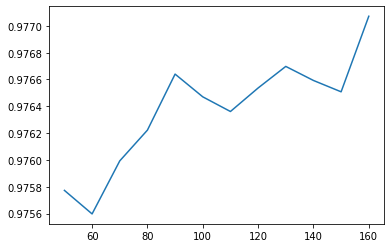

In [36]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

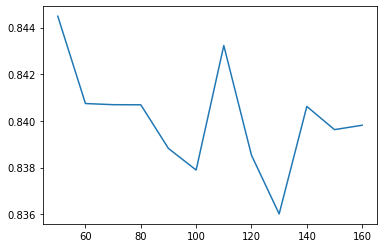

In [37]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [39]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 2.13
median_absolute_error: 0.45
r2_score: 0.77


#### Градиентный бустинг

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=80,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
test_model(gr_80)

mean_absolute_error: 2.34
median_absolute_error: 0.95
r2_score: 0.77


In [40]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 m...
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                

In [41]:
reg = gs.best_estimator_

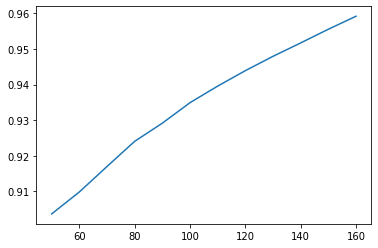

In [42]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

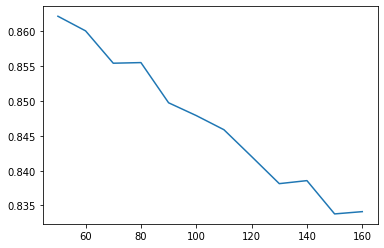

In [43]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [44]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 2.37
median_absolute_error: 0.99
r2_score: 0.77
